In [54]:
import pandas as pd

data = pd.read_csv('data.csv')
from sklearn.model_selection import train_test_split    

In [55]:
train,test=train_test_split(data,test_size=0.2,random_state=42)
training=train.copy()

scatter matrix

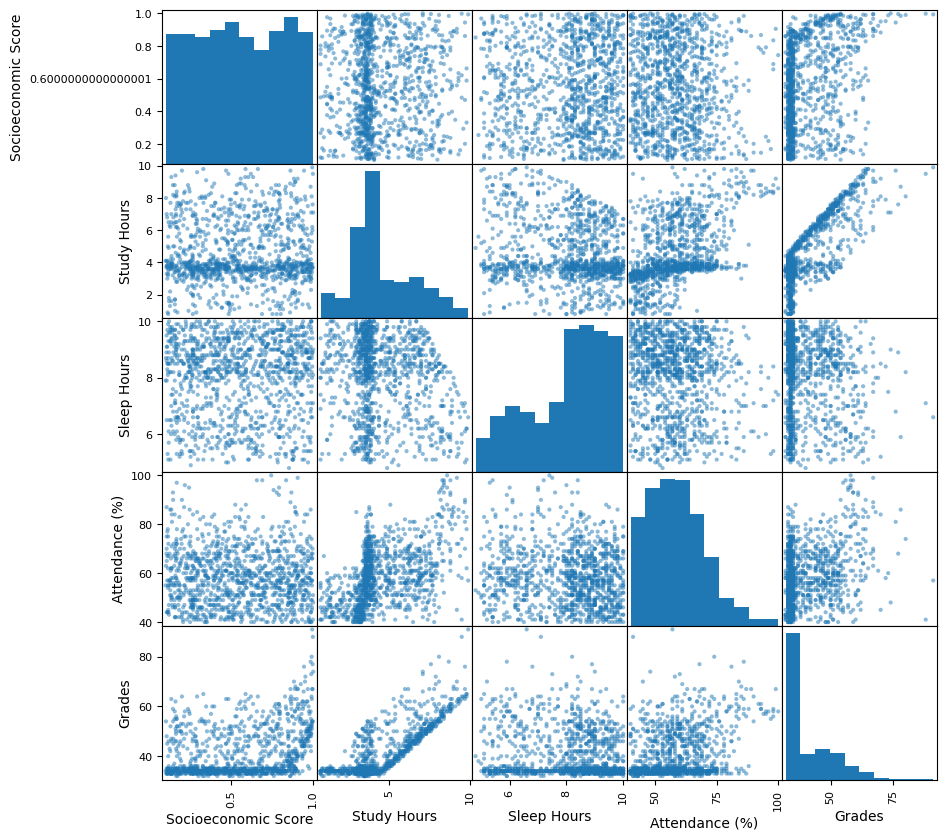

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(training,figsize=(10,10))
import matplotlib as plt


In [58]:
co=training.corr()
co['Grades'].sort_values(ascending=False)

Grades                 1.000000
Study Hours            0.814244
Socioeconomic Score    0.347185
Attendance (%)         0.329987
Sleep Hours           -0.109331
Name: Grades, dtype: float64

In [59]:
training.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,0.554901,4.582162,8.035045,58.502703,40.875676
std,0.261252,1.930395,1.372376,11.736954,9.644111
min,0.101550,0.800000,4.800000,40.000000,32.000000
25%,0.326823,3.400000,7.000000,49.000000,34.000000
50%,0.548700,3.900000,8.400000,57.000000,35.000000
75%,0.791560,6.000000,9.100000,66.000000,47.000000
max,0.999820,9.900000,10.000000,100.000000,91.000000


scaling attendance and grades for both training and test data

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
training['Grades'] = scaler.fit_transform(training['Grades'].values.reshape(-1, 1))
test['Grades'] = scaler.transform(test['Grades'].values.reshape(-1, 1))
training['Attendance (%)'] = scaler.fit_transform(training['Attendance (%)'].values.reshape(-1, 1))
test['Attendance (%)'] = scaler.transform(test['Attendance (%)'].values.reshape(-1, 1))


training.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1110.000000,1110.000000,1110.000000,1.110000e+03,1.110000e+03
mean,0.554901,4.582162,8.035045,-2.816566e-16,2.688540e-16
std,0.261252,1.930395,1.372376,1.000451e+00,1.000451e+00
min,0.101550,0.800000,4.800000,-1.577159e+00,-9.207356e-01
25%,0.326823,3.400000,7.000000,-8.100046e-01,-7.132617e-01
50%,0.548700,3.900000,8.400000,-1.280895e-01,-6.095247e-01
75%,0.791560,6.000000,9.100000,6.390650e-01,6.353188e-01
max,0.999820,9.900000,10.000000,3.537204e+00,5.199745e+00


In [61]:
co=training.corr()
co['Grades'].sort_values(ascending=False)

Grades                 1.000000
Study Hours            0.814244
Socioeconomic Score    0.347185
Attendance (%)         0.329987
Sleep Hours           -0.109331
Name: Grades, dtype: float64

slpit data into features and labels

In [62]:
X_train = training.drop(columns=['Grades'])  # Features
y_train = training['Grades']                # Target
X_test = test.drop(columns=['Grades'])
y_test = test['Grades']


model selection

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

pred=model.predict(X_test)


In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(y_test,pred)
print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  0.20739865812922242
R2 Score:  0.7446674729714067
Mean Absolute Error:  0.351271450348275


Text(0, 0.5, 'Predictions')

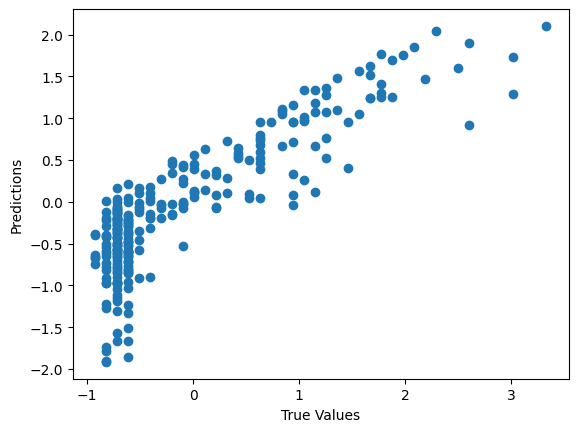

In [65]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

confusion matrix